## Training

In [1]:
from types import SimpleNamespace

In [2]:
import wandb, torch
from ddpm_conditional import *

In [3]:
config

namespace(run_name='DDPM_conditional',
          epochs=100,
          noise_steps=1000,
          seed=42,
          batch_size=10,
          img_size=64,
          num_classes=10,
          dataset_path=Path('datasets/cifar10_64/cifar10-64'),
          train_folder='train',
          val_folder='test',
          device='cuda',
          slice_size=1,
          use_wandb=True,
          do_validation=True,
          fp16=True,
          log_every_epoch=10,
          num_workers=10,
          lr=0.0003)

In [4]:
config.noise_steps = 100
config.epochs = 10
config.slice_size = 100
config.use_wandb = True
config.dataset_artifact = 'capecape/train_sd/CIFAR10_64:v0'
config.log_every_epoch = 5

In [5]:
diff = Diffusion(noise_steps=config.noise_steps, img_size=64, num_classes=10)

02:11:24 - ERROR: Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: capecape. Use `wandb login --relogin` to force relogin


02:11:30 - INFO: Starting epoch 0:


02:11:42 - INFO: Sampling 10 new images....


02:11:50 - INFO: Sampling 10 new images....


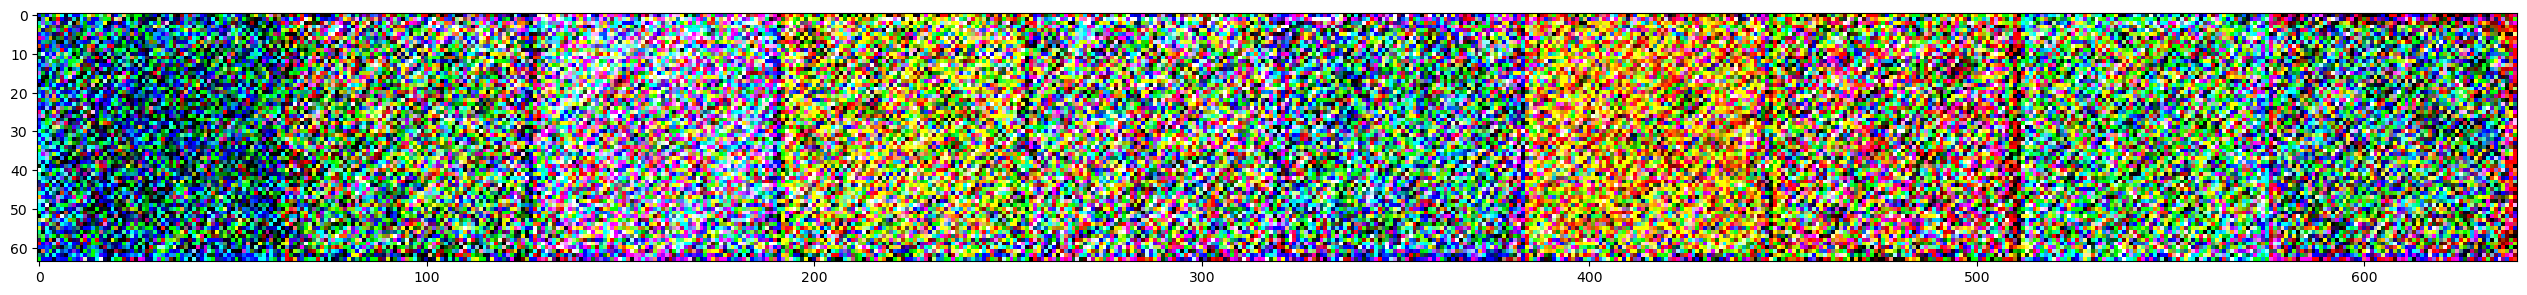

02:11:59 - INFO: Starting epoch 1:


02:12:10 - INFO: Starting epoch 2:


02:12:20 - INFO: Starting epoch 3:


02:12:31 - INFO: Starting epoch 4:


02:12:41 - INFO: Starting epoch 5:


02:12:51 - INFO: Sampling 10 new images....


02:13:00 - INFO: Sampling 10 new images....


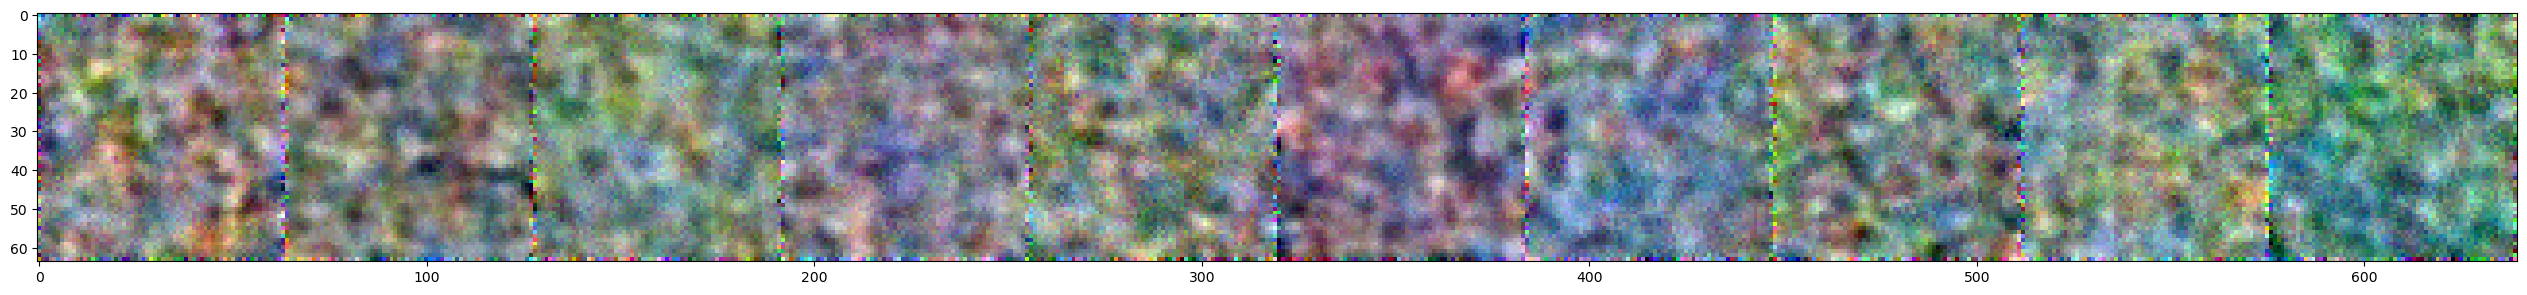

02:13:08 - INFO: Starting epoch 6:


02:13:19 - INFO: Starting epoch 7:


02:13:29 - INFO: Starting epoch 8:


02:13:39 - INFO: Starting epoch 9:


wandb: Adding directory to artifact (./models/DDPM_conditional)... Done. 0.8s


learning_rate,▁▁▂▂▃▄▅▆▇▇███████▇▇▇▇▆▆▅▅▅▄▄▃▃▃▂▂▂▂▁▁▁▁▁
train_mse,█▇▆▅▄▃▂▂▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁
val_mse,█▂▂▂▁▁▁▁▁▁
learning_rate,0.0
train_mse,0.09233
val_mse,4.3826


In [6]:
with wandb.init(project="train_sd", group="train", config=config):
    wandb.use_artifact(config.dataset_artifact, type='dataset')
    diff.fit(config)